<a href="https://colab.research.google.com/github/manishkhanal1989/Project/blob/main/Deep_Learning_Approach_for_CIFAR_10_Image_Classification_using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning Approach for CIFAR-10 Image Classification using Convolutional Neural Networks**

**Submitted By**: Manish Khanal

**Source:**

The dataset is retrieved from https://www.cs.toronto.edu/~kriz/cifar.html.

**Overview:**

This project is focused on utilizing the CIFAR-10 dataset for image classification through Convolutional Neural Networks (CNNs). The CIFAR-10 dataset comprises 60,000 color images with dimensions of 32x32 pixels, distributed across 10 distinct classes. The main objectives included preprocessing the data, formulating a CNN model, conducting training, and assessing its performance on the test set.

**Class Labels:**

0 - Airplane

1 - Automobile

2 - Bird

3 - Cat

4 - Deer

5 - Dog

6 - Frog

7 - Horse

8 - Ship

9 - Truck

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

**DATA PREPROCESSING**

We started by normalizing pixel values to a range between 0 and 1 and converted class labels to one-hot encoding. Visualization of sample images from each class was performed to gain insights into the dataset's composition and distribution.



In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
# Convert class labels to one-hot encoding
num_classes = 10
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

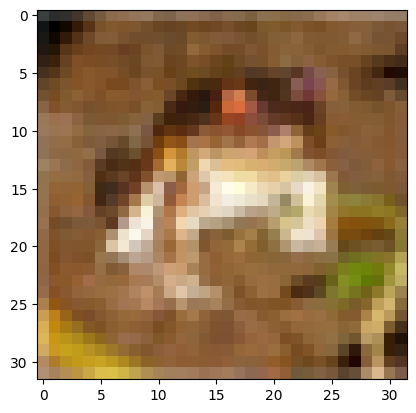

Class: frog


In [7]:
# Display the first image
plt.imshow(train_images[0])
plt.show()

# Print the corresponding class
print("Class:", class_names[np.argmax(train_labels[0])])

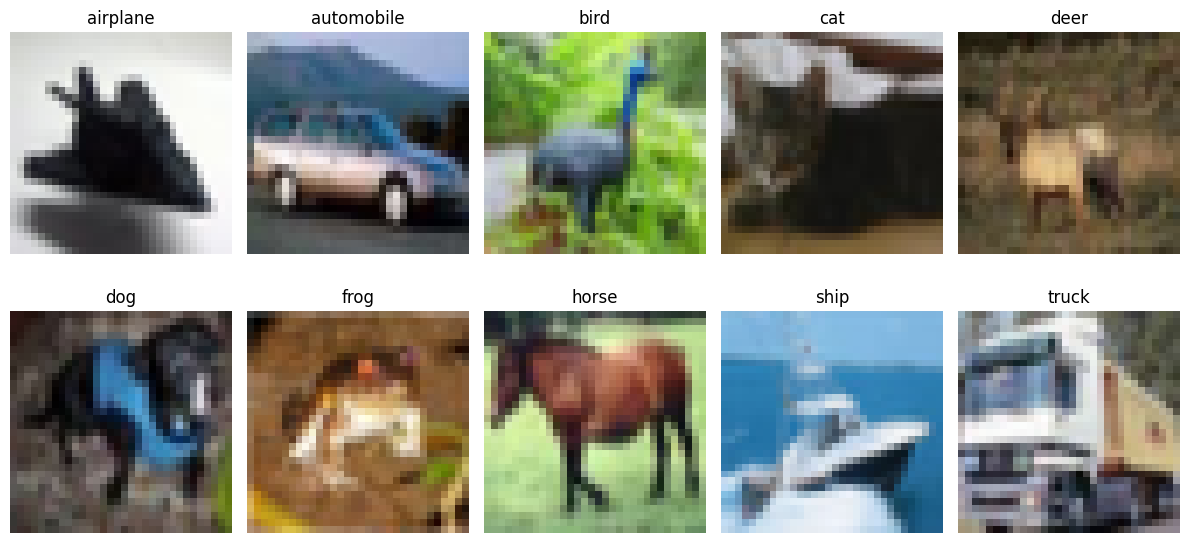

In [8]:
#Visualize sample of each class:

# Initialize a dictionary to store the indices of the first occurrence of each class
class_indices = {class_name: None for class_name in class_names}

# Find the index of the first occurrence of each class in the training set
for i, label in enumerate(train_labels):
    class_index = np.argmax(label)
    if class_indices[class_names[class_index]] is None:
        class_indices[class_names[class_index]] = i

# Display one image from each class along with its corresponding class label
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i, class_name in enumerate(class_names):
    index = class_indices[class_name]
    axes[i].imshow(train_images[index])
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
#Check the shape of the dataset
print("Preprocessed Train Image Shape:", train_images.shape)
print("Preprocessed Test Image Shape:", test_images.shape)
print("Preprocessed Train Label Shape:", train_labels.shape)
print("Preprocessed Test Label Shape:", test_labels.shape)

Preprocessed Train Image Shape: (50000, 32, 32, 3)
Preprocessed Test Image Shape: (10000, 32, 32, 3)
Preprocessed Train Label Shape: (50000, 10)
Preprocessed Test Label Shape: (10000, 10)


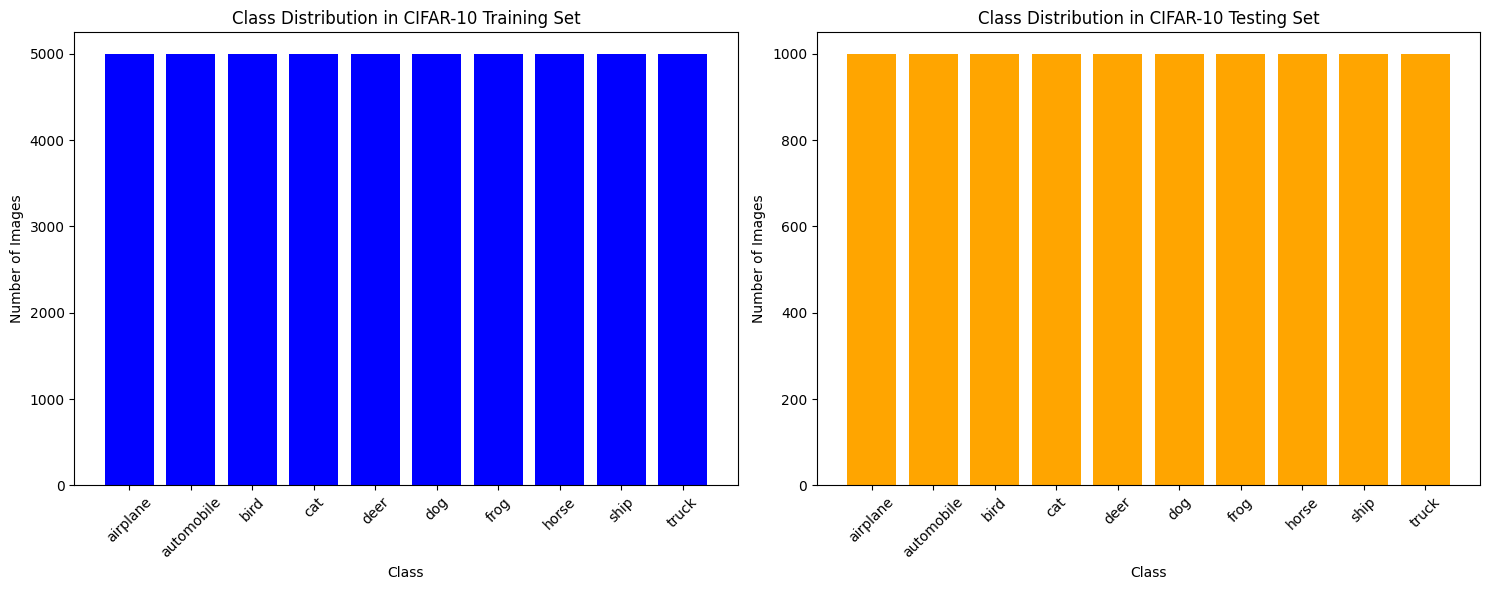

In [10]:
# Count occurrences of each class label in the training set
train_class_counts = {class_name: 0 for class_name in class_names}
for label in train_labels:
    class_index = np.argmax(label)
    train_class_counts[class_names[class_index]] += 1

# Count occurrences of each class label in the testing set
test_class_counts = {class_name: 0 for class_name in class_names}
for label in test_labels:
    class_index = np.argmax(label)
    test_class_counts[class_names[class_index]] += 1

# Plot class distribution for training set
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(class_names, train_class_counts.values(), color='blue')
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Plot class distribution for testing set
plt.subplot(1, 2, 2)
plt.bar(class_names, test_class_counts.values(), color='orange')
plt.title('Class Distribution in CIFAR-10 Testing Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**DEVELOPING MODEL**

The CNN model architecture was designed consisting of convolutional layers followed by max-pooling, dropout layers, and dense layers for classification. The model was compiled with the Adam optimizer and categorical cross-entropy loss function. Data augmentation techniques such as rotation, shifting, flipping, and zooming were applied to enrich the training dataset and enhance model generalization.



In [11]:
# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense (fully connected) layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [12]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly by up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Shift images vertically by up to 10% of the height
    horizontal_flip=True,   # Flip images horizontally
    zoom_range=0.1          # Zoom images by up to 10%
)

datagen.fit(train_images)  # Fit the ImageDataGenerator to the training data

In [13]:
# Define the batch size
batch_size = 32

# Define the number of epochs for training
epochs = 10


# Train the model with augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    steps_per_epoch=len(train_images) // batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1562/1562 [==============================] - 43s 25ms/step - loss: 1.6437 - accuracy: 0.3981 - val_loss: 1.3621 - val_accuracy: 0.5105
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.3333 - accuracy: 0.5231 - val_loss: 1.1838 - val_accuracy: 0.5833
Epoch 3/10
1562/1562 [==============================] - 37s 24ms/step - loss: 1.2138 - accuracy: 0.5676 - val_loss: 1.0706 - val_accuracy: 0.6231
Epoch 4/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.1442 - accuracy: 0.5939 - val_loss: 1.0073 - val_accuracy: 0.6460
Epoch 5/10
1562/1562 [==============================] - 35s 23ms/step - loss: 1.1012 - accuracy: 0.6111 - val_loss: 1.0198 - val_accuracy: 0.6451
Epoch 6/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.0525 - accuracy: 0.6301 - val_loss: 0.9199 - val_accuracy: 0.6722
Epoch 7/10
1562/1562 [==============================] - 37s 24ms/step - loss: 1.0139 - accuracy: 0.6423 - val_loss: 0.9001 -

**MODEL EVALUATION**

The model achieved a test accuracy of 69%. The classification report revealed precision, recall, F1-score, and support metrics for each class. The model exhibited strong performance in classes like automobiles, ships, and trucks, while performance was relatively lower in classes like birds and cats.




In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.8999 - accuracy: 0.6928
Test Accuracy: 69.28%


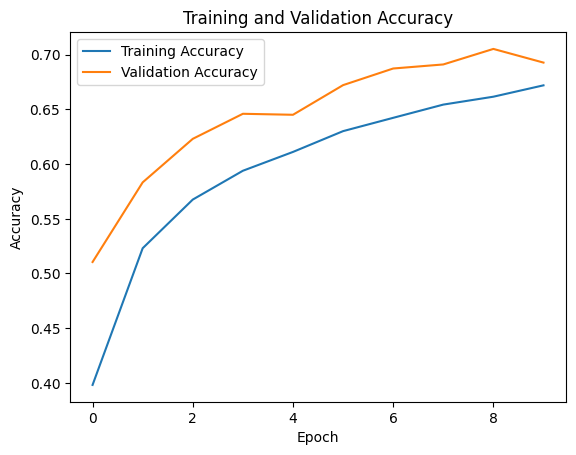

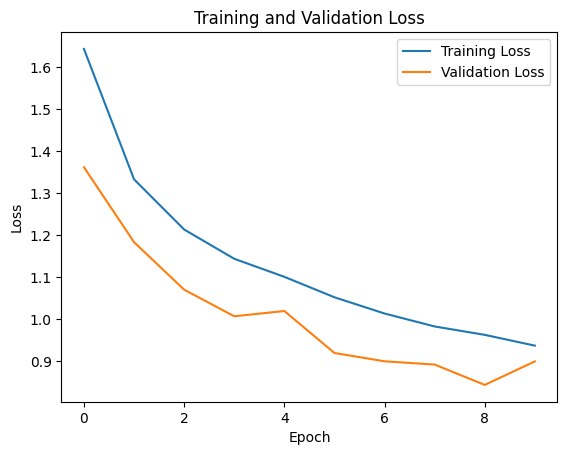

In [19]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 [==============================] - 1s 2ms/step


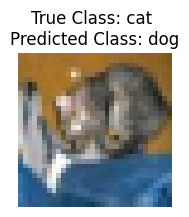

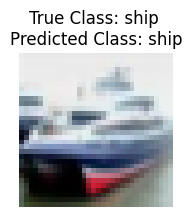

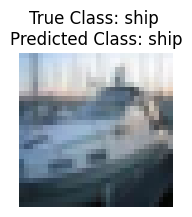

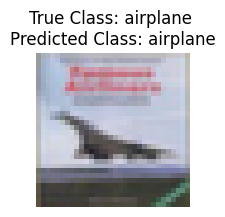

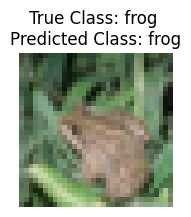

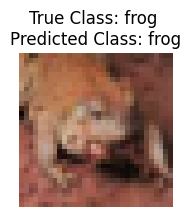

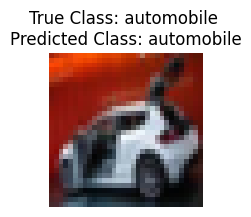

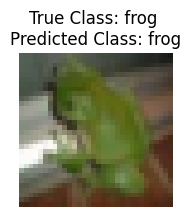

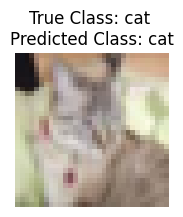

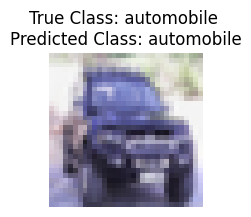

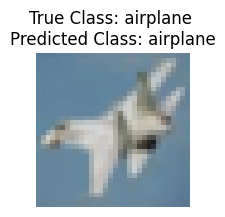

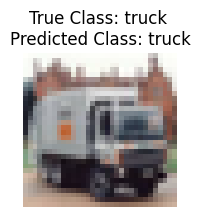

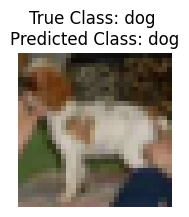

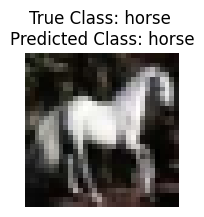

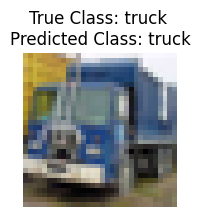

In [20]:
#Making predictions
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)

# Display the first 15 predictions along with the images
for i in range(15):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i])
    plt.title(f"True Class: {class_names[np.argmax(test_labels[i])]} \nPredicted Class: {class_names[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()

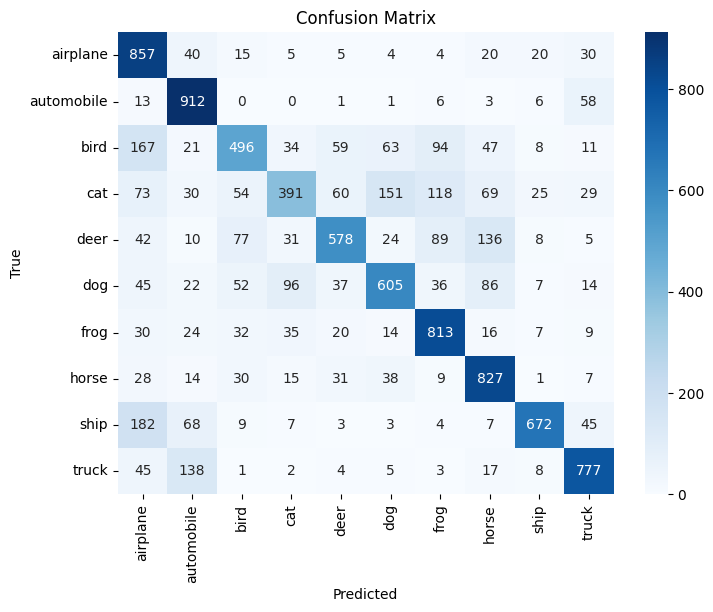

Classification Report:
               precision    recall  f1-score   support

    airplane       0.58      0.86      0.69      1000
  automobile       0.71      0.91      0.80      1000
        bird       0.65      0.50      0.56      1000
         cat       0.63      0.39      0.48      1000
        deer       0.72      0.58      0.64      1000
         dog       0.67      0.60      0.63      1000
        frog       0.69      0.81      0.75      1000
       horse       0.67      0.83      0.74      1000
        ship       0.88      0.67      0.76      1000
       truck       0.79      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000



In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Get the true labels (convert one-hot encoding to class indices)
true_labels = np.argmax(test_labels, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate and display the classification report
classification_rep = classification_report(true_labels, predicted_classes, target_names=class_names)
print("Classification Report:\n", classification_rep)


**Analysis**

The CNN model trained on the CIFAR-10 dataset exhibited notable performance, achieving a test accuracy of 69%. Let's delve deeper into the analysis of the model's performance and classification results:

**Model Performance:**

Accuracy: The overall accuracy of 69% indicates that the model correctly classified 69% of the test set images.

**Airplane, Automobile, and Ship:** These classes exhibited relatively higher precision, recall, and F1-scores, indicating that the model performed well in accurately classifying images belonging to these categories.

**Frog and Horse:** While the model achieved high recall for these classes, precision was relatively lower. This suggests that the model tended to classify images as frogs and horses even if they belonged to other classes, leading to a higher number of false positives.

**Bird and Cat:** These classes showed lower precision, recall, and F1-scores compared to others. The model struggled to accurately classify images belonging to these categories, resulting in a higher number of misclassifications.

**Deer and Dog:** Precision and recall for these classes were moderate, indicating average performance in classification.

**Truck:** The truck class exhibited relatively high precision and recall, indicating good performance in accurately identifying images of trucks.


**Conclusion**

In conclusion, while the CNN model exhibited average performance in image
classification, a comprehensive analysis of precision, recall, and F1-scores, along with insights from
the confusion matrix, provides valuable guidance for refining the model and improving its overall
effectiveness in real-world applications. By delving into the nuances of classification performance
across different classes, we can identify areas of strength and opportunities for enhancement. Fur-
ther optimization strategies, such as fine-tuning the model architecture, adjusting hyperparameters,
and diversifying the training data, hold the potential to elevate the model’s performance and ad-
dress specific classification challenges. Thus, this iterative process of evaluation and refinement is
crucial for maximizing the CNN model’s utility and robustness in practical scenarios.